# G2M Insights for Cab Investment Firm

## Import Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
import datetime
import calendar
from datetime import date, timedelta
warnings.filterwarnings("ignore")
import calendar

## Load the datasets

In [58]:
# load datasets
cab_df = pd.read_csv('Cab_Data.csv')
customer_df = pd.read_csv('Customer_ID.csv')
transaction_df = pd.read_csv('Transaction_ID.csv')
city_df = pd.read_csv('City.csv')

## Review the datasets

### Cab Dataset

In [59]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [60]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [61]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [62]:
cab_df.describe(include=['object'])

,Company,City
count,359392,359392
unique,2,19
top,Yellow Cab,NEW YORK NY
freq,274681,99885


In [63]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [64]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [65]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [66]:
cab_df.duplicated().sum()

0

### Customer dataset

In [67]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [68]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [69]:
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [70]:
customer_df.describe(include=['object'])

,Gender
count,49171
unique,2
top,Male
freq,26562


In [71]:
customer_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [72]:
customer_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [73]:
customer_df.duplicated().sum()

0

### Transaction data

In [74]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [75]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [76]:
transaction_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [77]:
transaction_df.describe(include=['object'])

,Payment_Mode
count,440098
unique,2
top,Card
freq,263991


In [78]:
transaction_df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [79]:
transaction_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [80]:
transaction_df.duplicated().sum()

0

### City dataset

In [81]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [82]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [83]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [84]:
city_df.describe(include=['object'])

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [85]:
city_df['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [86]:
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [87]:
city_df.duplicated().sum()

0

## Preprocessing data

### change Date of Travel from integer to datetime

In [88]:
number = cab_df['Date of Travel'].to_list()
first_date = date(1899,12,30)
new_dates = [first_date + timedelta(n) for n in number]
cab_df['Date of Travel'] = pd.to_datetime(new_dates)

In [89]:
cab_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

### change data types of Population and Users of City dataset to integers

In [90]:
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(int)

In [91]:
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(int)

In [92]:
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

### Merge all four datasets into one

In [93]:
G2M_cab = cab_df.merge(transaction_df, on='Transaction ID').merge(customer_df,on='Customer ID').merge(city_df, on='City')
G2M_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [94]:
G2M_cab.duplicated().sum()

0

In [95]:
np.sum(G2M_cab.isnull())

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

### Add new column for season

In [96]:
def season_of_date(date):
    year = str(date.year)

    # Extract a string of only the date of the DateTime column, use that in the if statements.
    date_only = str(date.date())

    # Changed the format of the date_range from DD-MM-YYYY to YYYY-MM-DD.
    seasons = {'Spring': pd.date_range(start=year+'/03/21', end=year+'/06/20'),
           'Summer': pd.date_range(start=year+'/06/21', end=year+'/09/22'),
           'Fall': pd.date_range(start=year+'/09/23', end=year+'/12/20')}
    if date_only in seasons['Spring']:
        return 'Spring'
    if date_only in seasons['Summer']:
        return 'Summer'
    if date_only in seasons['Fall']:
        return 'Fall'
    else:
        return 'Winter'

# Assuming df has a date column of type `datetime`
G2M_cab['Season'] = G2M_cab['Date of Travel'].apply(season_of_date)

In [97]:
G2M_cab['Season'].unique()

array(['Winter', 'Summer', 'Fall', 'Spring'], dtype=object)

### Add new column for day of the week

In [98]:
G2M_cab['Day of the week'] = G2M_cab['Date of Travel'].dt.day_name()

### Add new column for profit

In [99]:
G2M_cab['Profit of Trip'] = G2M_cab['Price Charged'] - G2M_cab['Cost of Trip']

### Add new column for Year

In [100]:
G2M_cab['Year'] = G2M_cab['Date of Travel'].dt.year

In [101]:
G2M_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Season,Day of the week,Profit of Trip,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,Winter,Friday,57.3150,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,Summer,Saturday,281.2772,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,Fall,Friday,194.6480,2018
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,Winter,Wednesday,23.6660,2016
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,Spring,Saturday,253.9808,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,Winter,Saturday,143.6180,2018
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,Spring,Friday,23.0464,2018
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,Summer,Friday,-5.8540,2018
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,Summer,Thursday,-6.0900,2018


## Analysis

### which Cab company has more rides

[Text(0, 0, '274681 (76%)'), Text(0, 0, '84711 (24%)')]

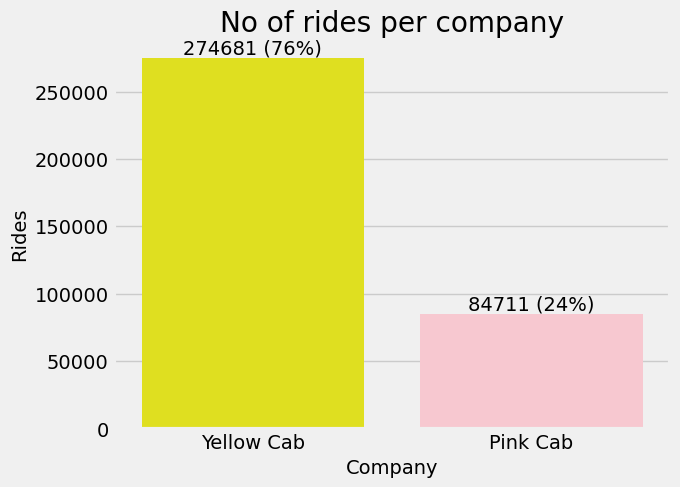

In [102]:
ax = sns.countplot(x=G2M_cab['Company'],
                   order=G2M_cab['Company'].value_counts(ascending=False).index,
                   palette=['#FFFF00','#FFC0CB'])
        
abs_values = G2M_cab['Company'].value_counts(ascending=False)
rel_values = G2M_cab['Company'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.set_title('No of rides per company')
ax.set_ylabel('Rides')

ax.bar_label(container=ax.containers[0], labels=lbls)


No of rides are more for Yellow cabs compared to Pink cabs

### Which company has more number of users

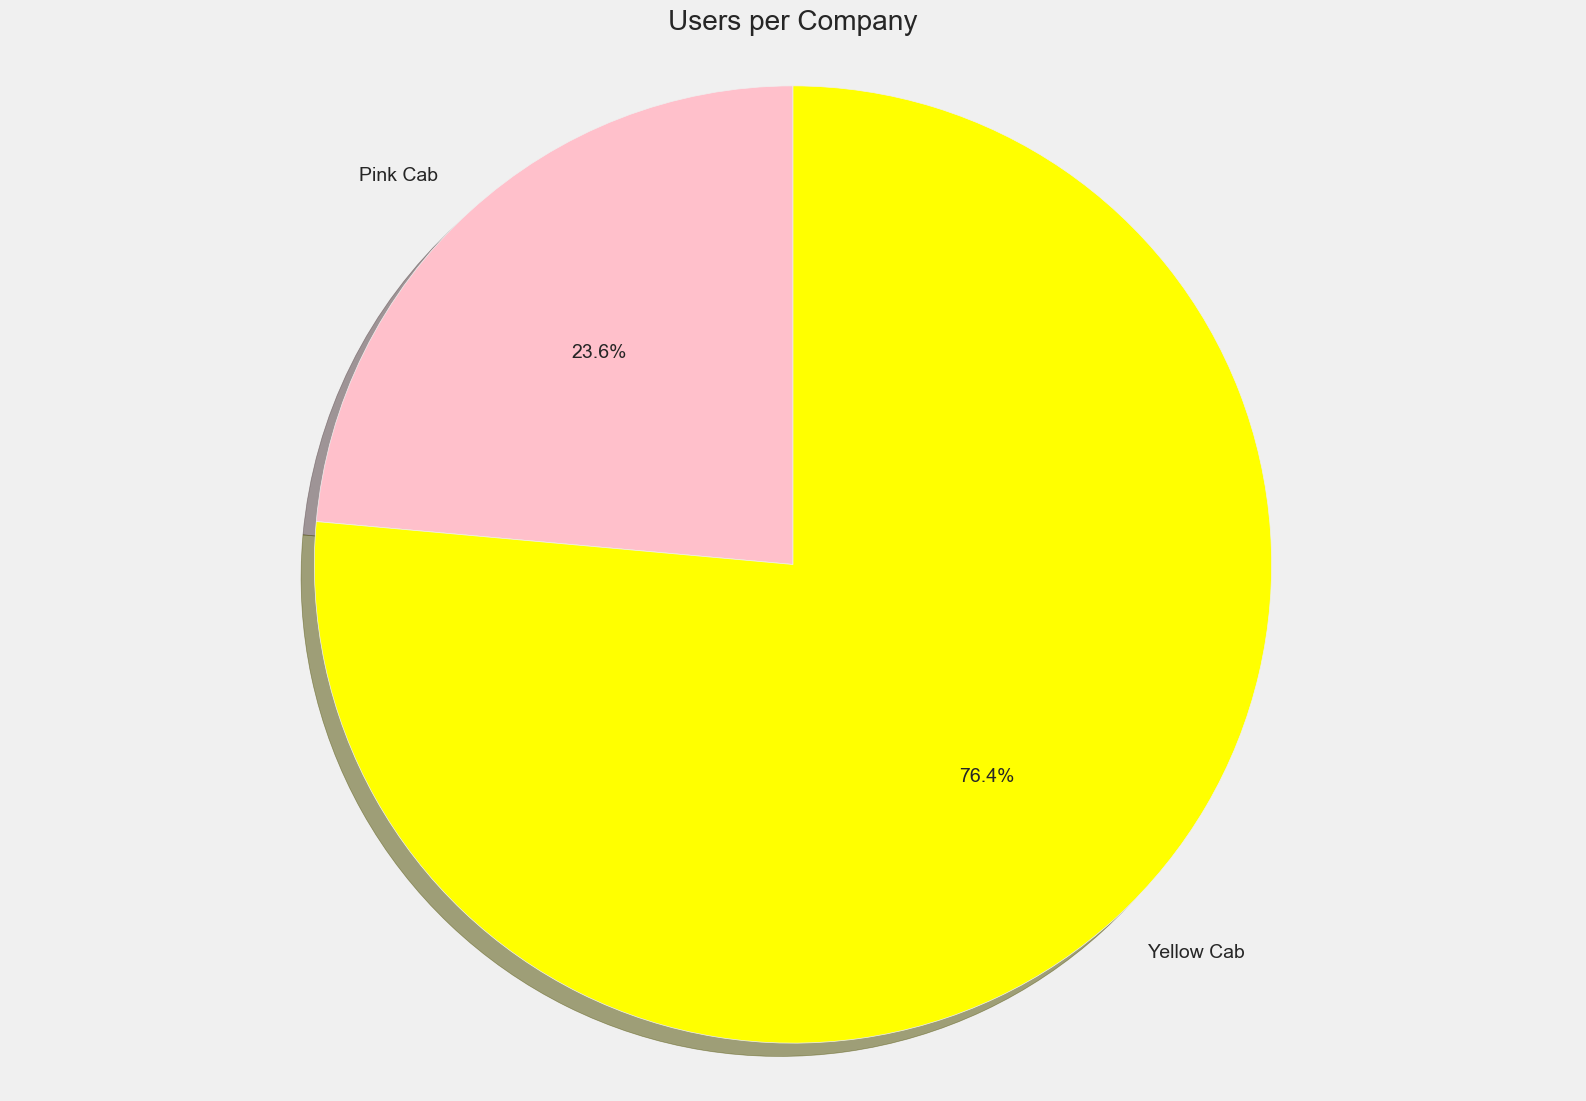

In [128]:
city_users = G2M_cab.groupby('Company')
city_users = city_users.Users.count()
labls = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labls, autopct='%1.1f%%',shadow=True, startangle=90, colors=['#FFC0CB','#FFFF00'])
axp.axis('equal')
plt.title('Users per Company')
plt.show()

More number of users chose Yellow cabs (76.4%) compared to Pink cabs (23.6%)

### Gender has any effect on number of rides

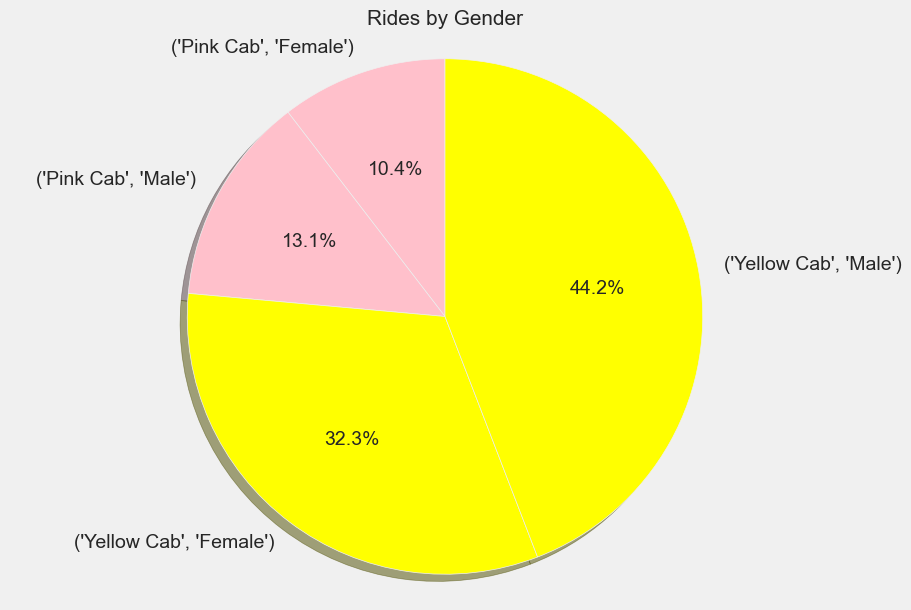

In [142]:
gender_df=G2M_cab.groupby(['Company','Gender'])
gender_df = gender_df['Transaction ID'].nunique()

labls = gender_df.index
vals = gender_df.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labls, autopct='%1.1f%%',shadow=True, startangle=90, colors=['#FFC0CB','#FFC0CB','#FFFF00','#FFFF00'])
axp.axis('equal')

plt.title('Rides by Gender', fontsize = 15)
plt.show()

Both Cab rides are taken more by male customers than female customers.
Yellow cab have higher percentage of male customers and  female customers compared to Pink Cab.

### Payment Mode by Company

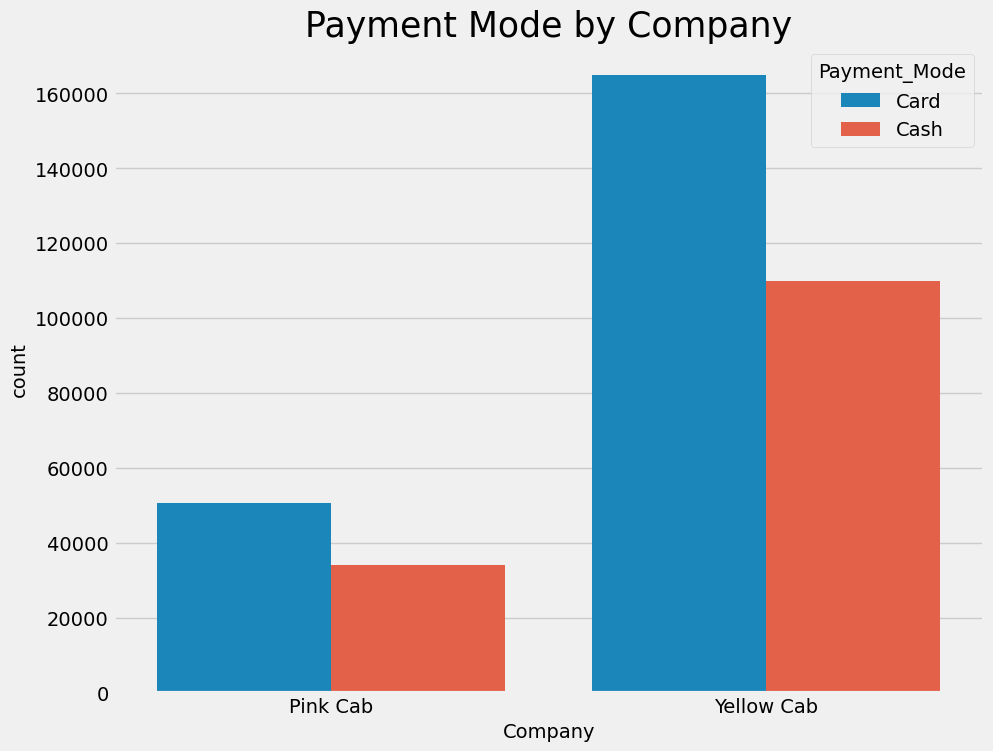

In [104]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=G2M_cab)
plt.title('Payment Mode by Company', fontsize=25)
plt.show()

Both Cab companies have higher number of Card payments compared to cash payments.

### Rides per weekday and company

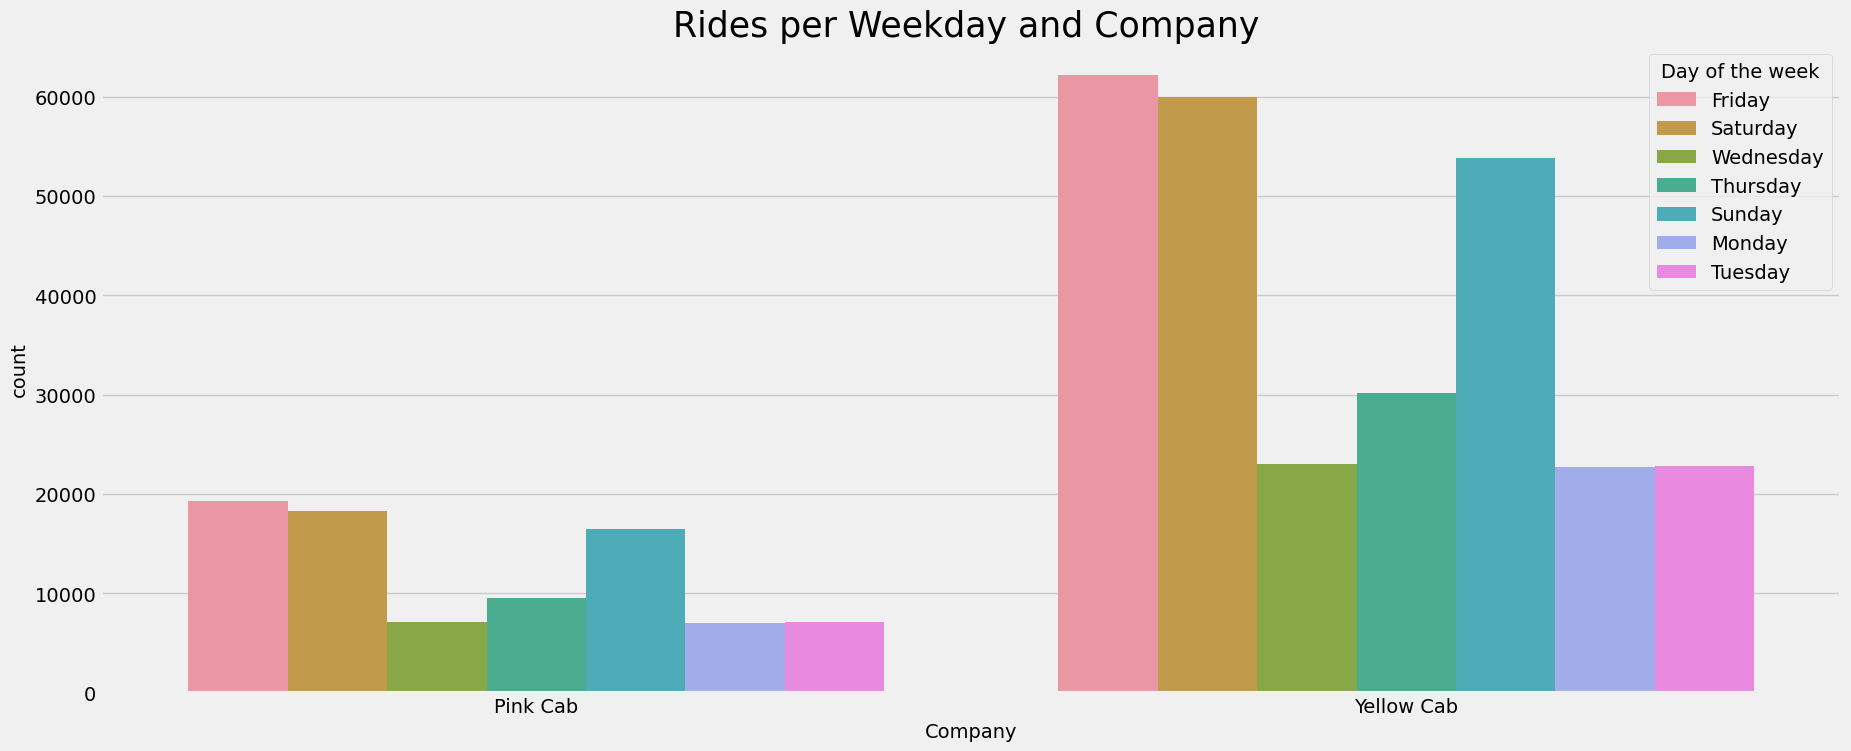

In [105]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(x="Company", hue="Day of the week", data=G2M_cab)
plt.title('Rides per Weekday and Company ', fontsize=25)
plt.show()

Both have similar effect based on the day of the week. Higher cab rides are on Friday and lowest rides on Wednesday. 
Saturday and Sundays ie. weekends have comparatively high rides.

### Is there any seasonality effect on number of rides

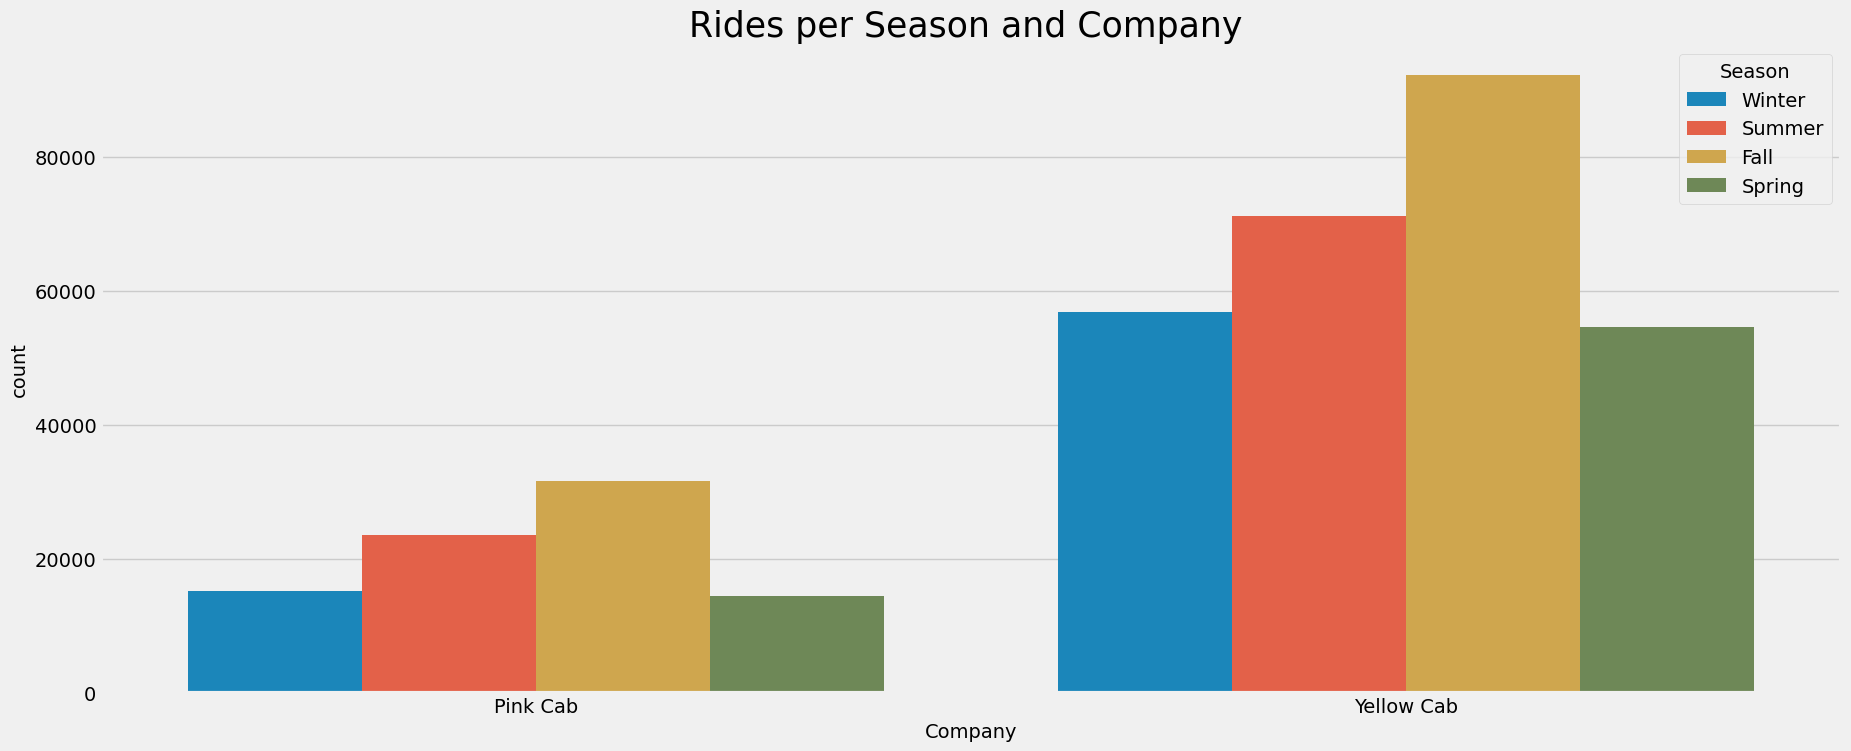

In [106]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(x="Company", hue="Season", data=G2M_cab)
plt.title('Rides per Season and Company ', fontsize=25)
plt.show()

The no of rides for both companies have seasonality effect. Higher number of rides taken in Fall and lower in Winter.

### Rides by Year

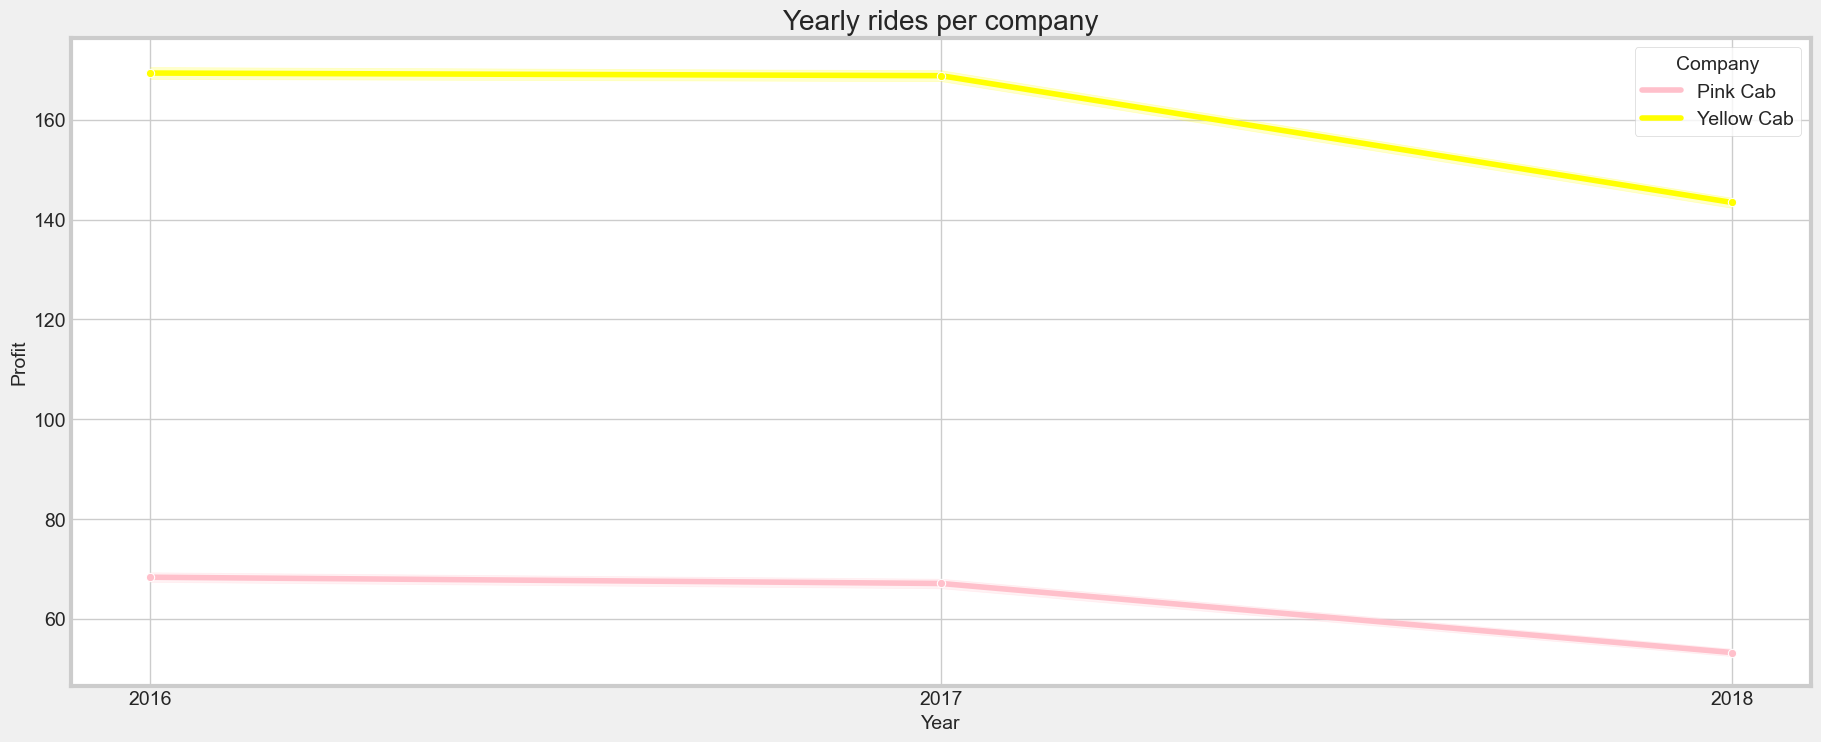

In [107]:
plt.figure(figsize = (20, 8))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='Profit of Trip', hue="Company", data=G2M_cab, marker='o',palette=['#FFC0CB','#FFFF00'])
plt.xlabel("Year", size=14)
plt.ylabel("Profit", size=14)
plt.xticks([2016,2017,2018])
plt.title("Yearly rides per company")
plt.show()

For both companies, profits were same in 2016 & 2017 and declined in 2018.

### No of users by company

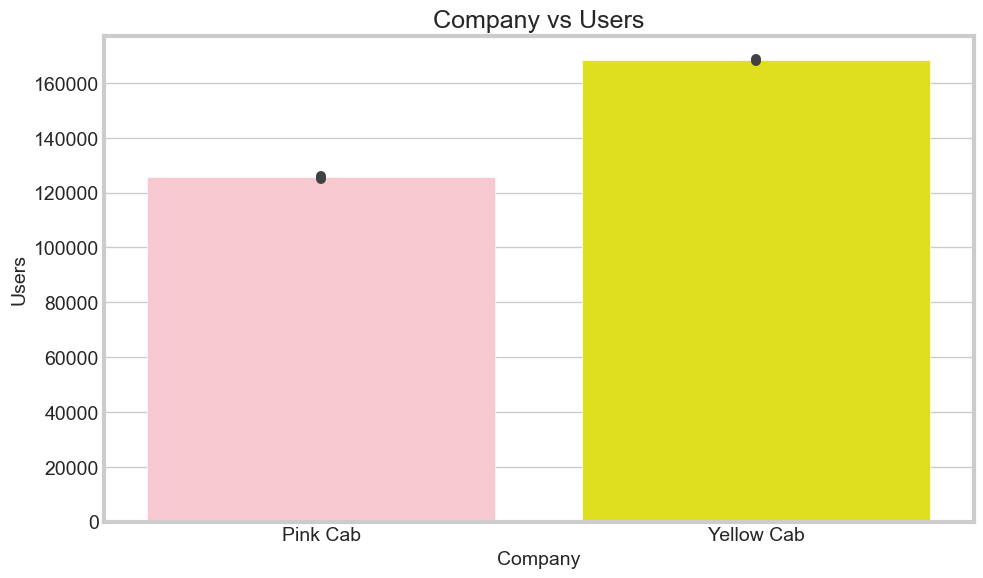

In [108]:
plt.figure(figsize = (10,6))
sns.barplot(x='Company',y='Users',color='r',data=G2M_cab,palette=['#FFC0CB','#FFFF00'])
plt.title('Company vs Users',size=18)
plt.xlabel('Company',size=14)
plt.ylabel('Users',size=14)
plt.show()

More numbers of users chose Yellow Cab cabs over Pink Cab cabs.

### City Vs Profit

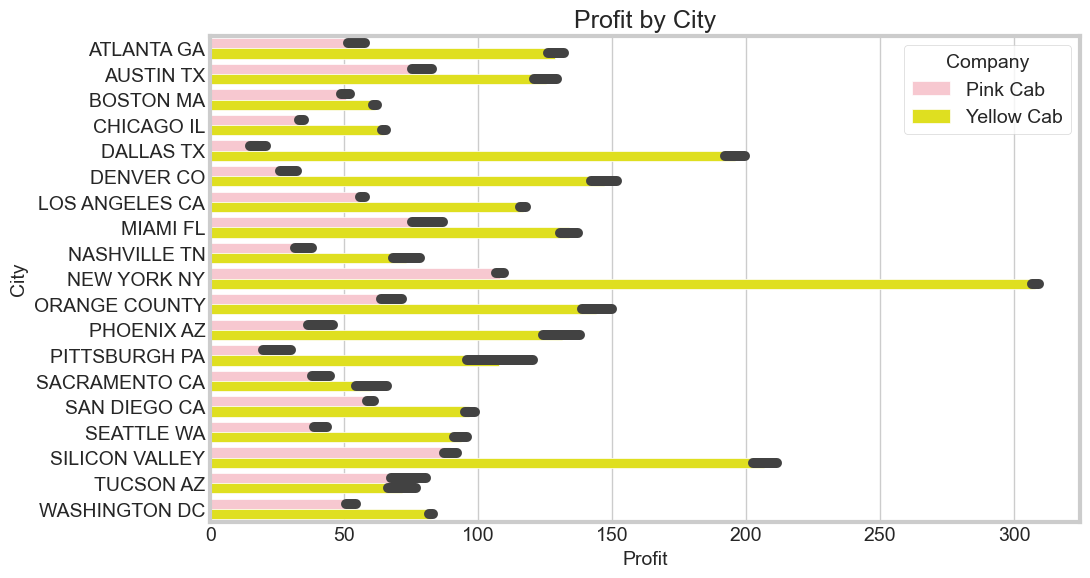

In [127]:
plt.figure(figsize = (10,6))
sns.barplot(x='Profit of Trip',y='City',hue='Company',color='r',data=G2M_cab,palette=['#FFC0CB','#FFFF00'])
plt.title('Profit by City',size=18)
plt.xlabel('Profit',size=14)
plt.ylabel('City',size=14)
plt.show()

Pink Cab has lower profits in Dallas and higher profits in New York.
Yellow Cab have lower profits in Boston and highest profits in New York.
Overall New York city have higher profits.

### Price charged vs distance travelled

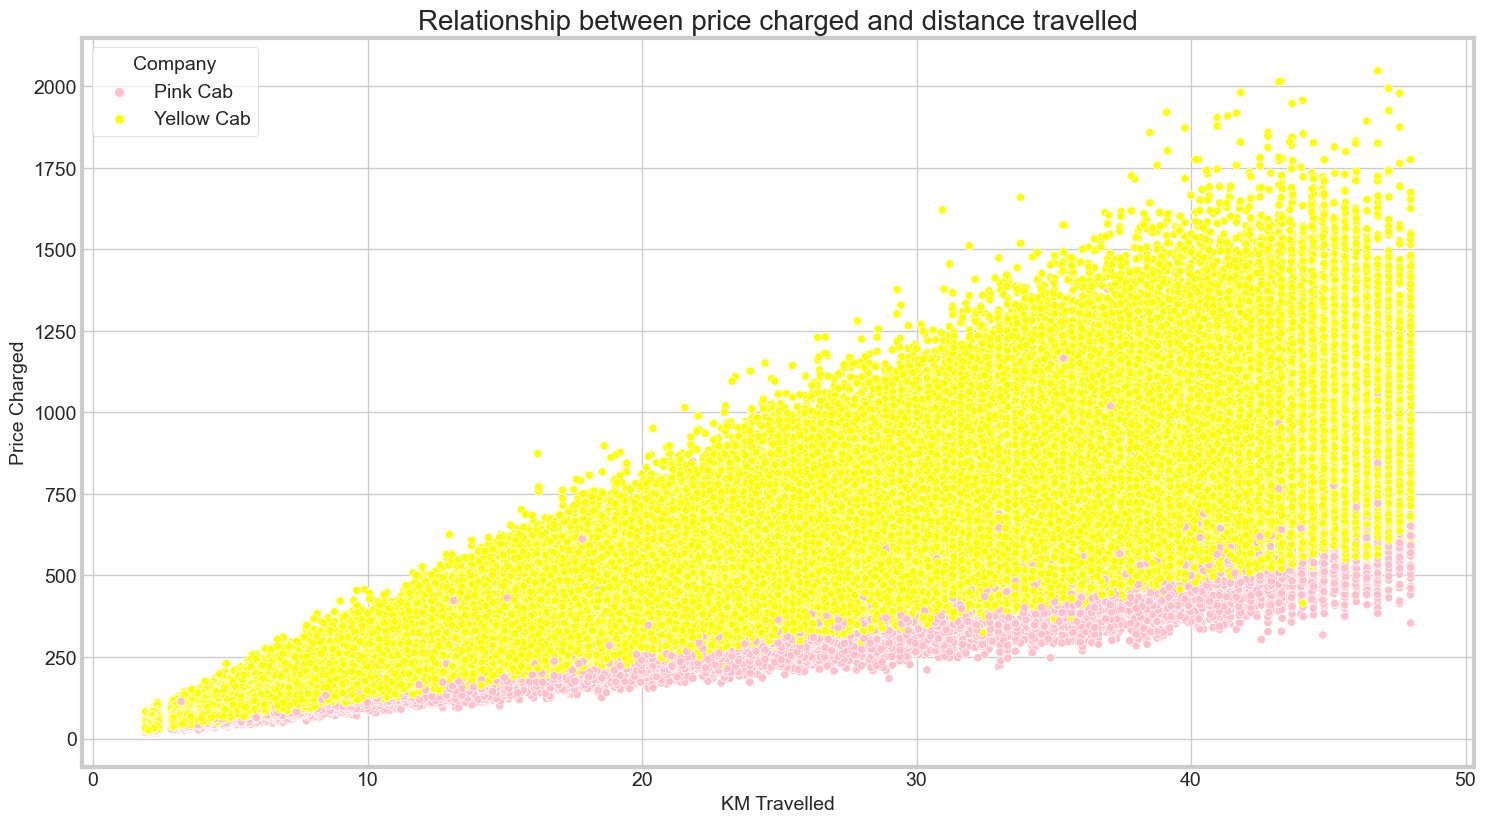

In [109]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=G2M_cab, x="KM Travelled", y='Price Charged', hue='Company',palette=['#FFC0CB','#FFFF00'])
plt.title('Relationship between price charged and distance travelled',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()


### Profit Vs KM Travelled

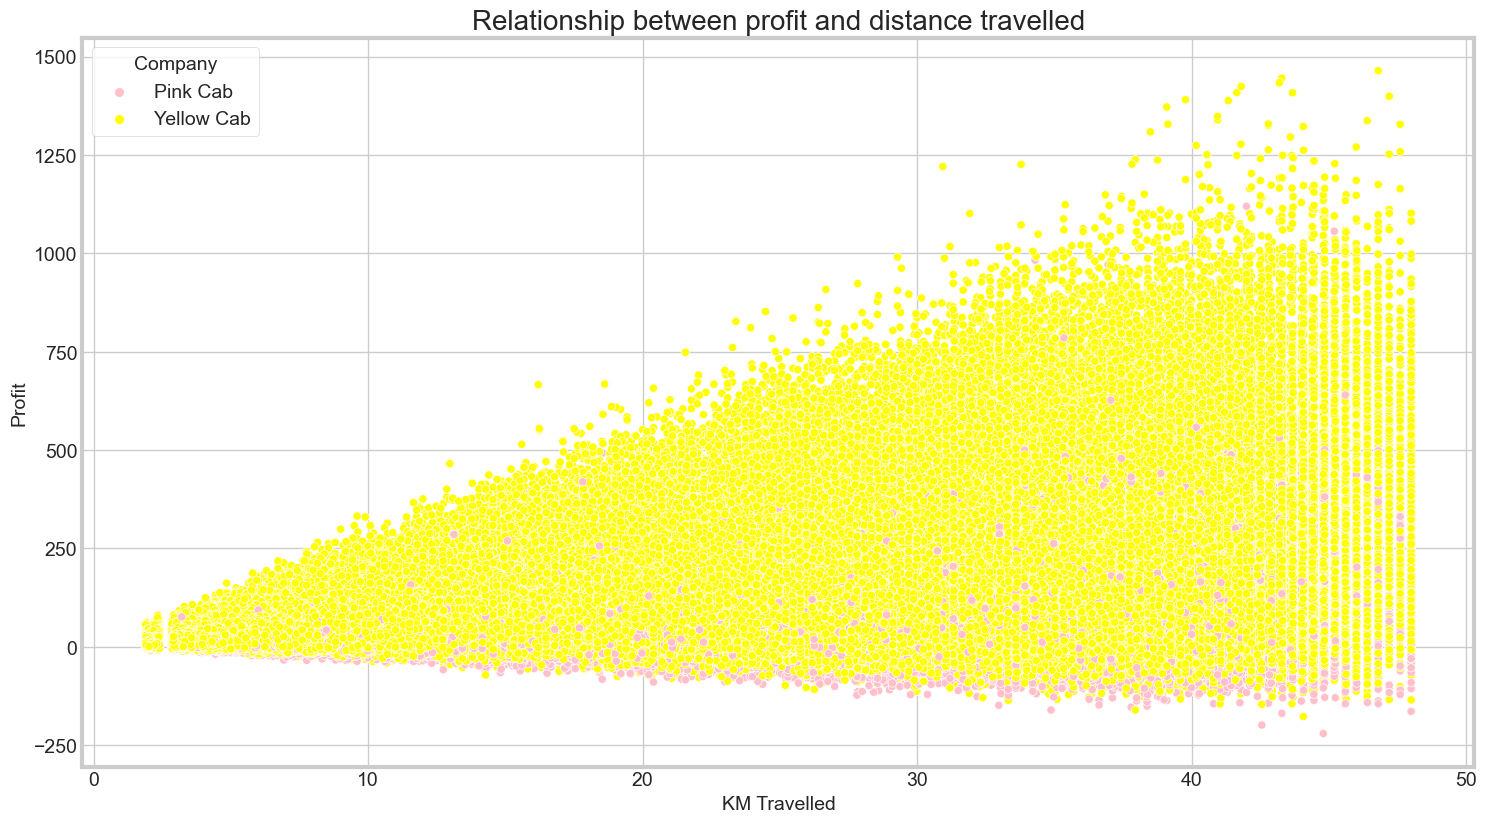

In [118]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=G2M_cab, x="KM Travelled", y='Profit of Trip', hue='Company',palette=['#FFC0CB','#FFFF00'])
plt.title('Relationship between profit and distance travelled',fontsize = 20)
plt.ylabel('Profit',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()


#### We can see profit and distance travelled are direclty proportional to each other and have linear relationship. 
Yellow Cab cabs have high profits compared Pink Cab company.

### Understanding Profit by Company using Box plot

[Text(0.5, 1.0, 'Profit by Company')]

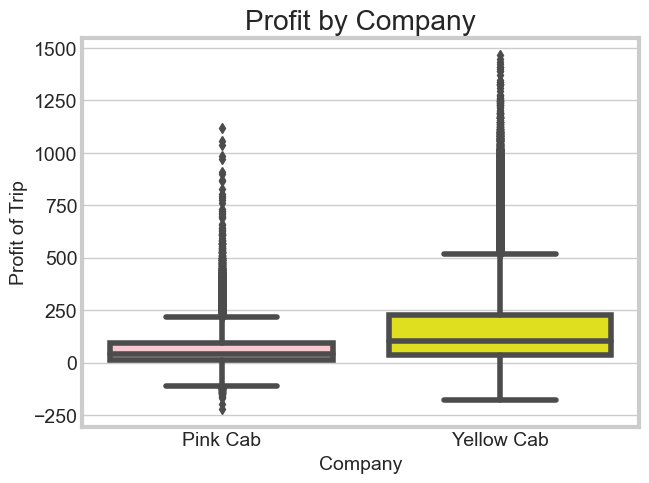

In [110]:
df = G2M_cab[['Company', 'Profit of Trip']]
sns.boxplot(x='Company', y='Profit of Trip', data=df,palette=['#FFC0CB','#FFFF00']).set(title="Profit by Company")

Yellow cabs have higher profits compared to Pink Cabs. There are negative profits for Pink Cabs

### Check for correlation between variables

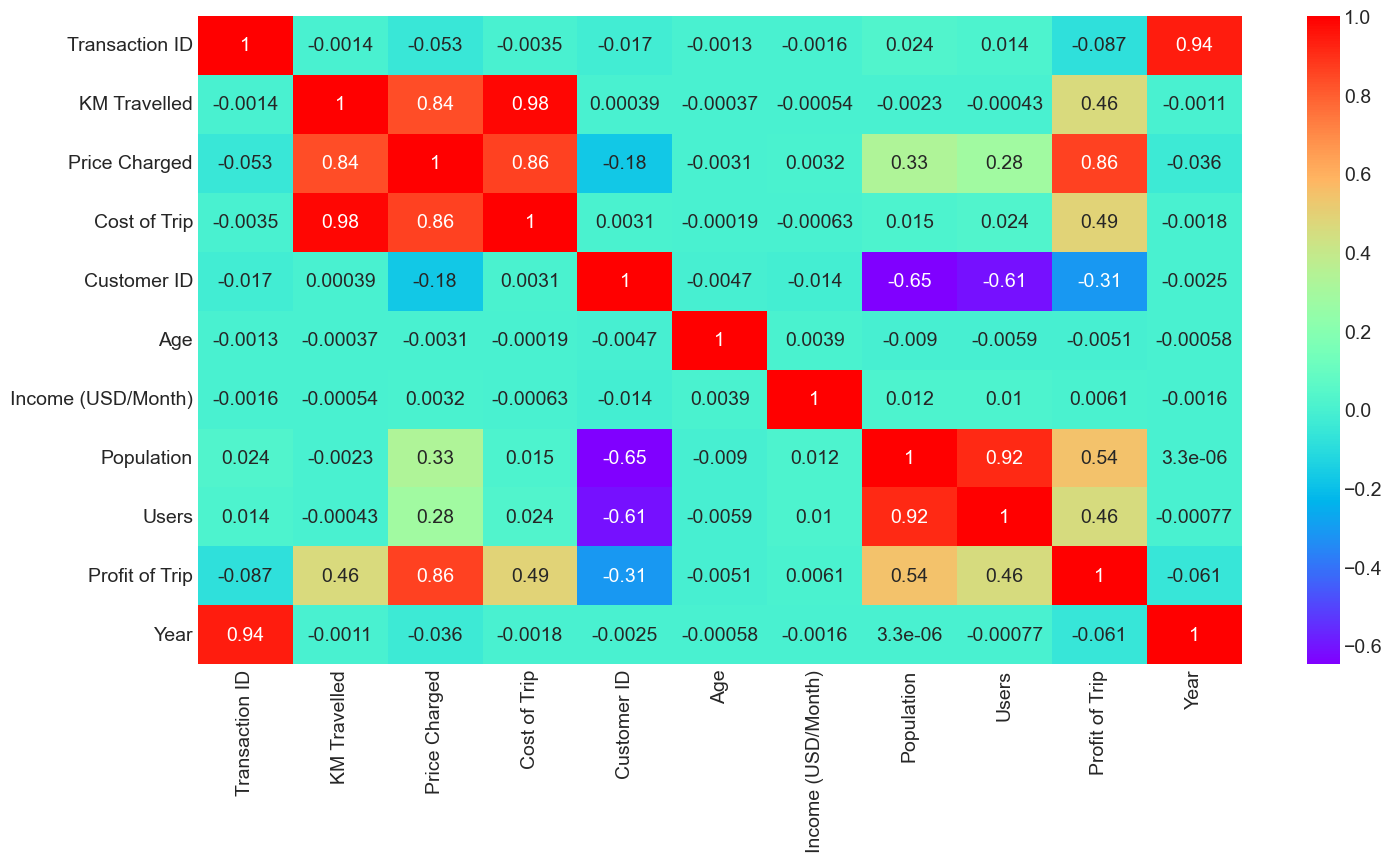

In [124]:
plt.figure(figsize = (15,8))
sns.heatmap(G2M_cab.corr(), annot=True, cmap = 'rainbow')
plt.show()

There are strong correlations between KM Travelled, Price Charged and Cost of Trip.
High correlation between Profit and Price Charged.
Users and Population are highly correlated.

### create dataframes for Pink Cab and Yellow Cab

In [111]:
Pink_Cab_rides = G2M_cab[G2M_cab['Company'] == 'Pink Cab']
Yellow_Cab_rides = G2M_cab[G2M_cab['Company'] == 'Yellow Cab']

### Distribution of age

Text(0.5, 1.0, 'Histogram of Age')

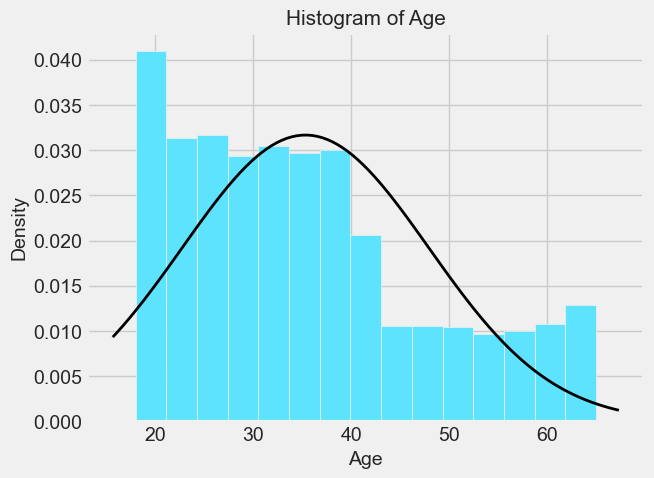

In [139]:
#mean and standard deviation: 
from scipy.stats import norm

mean, std = norm.fit(G2M_cab['Age'])

#plot the histogram:

plt.hist(G2M_cab['Age'], bins = 15, density=True, alpha=1, color = '#5ee3ff')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age', fontsize = 15)

Higher number of customers are in the age group of 20-22 years and lower in the range of 50-60

### Understand distribution of Price Charged across companies

Text(0.5, 1.0, 'Histogram of Price')

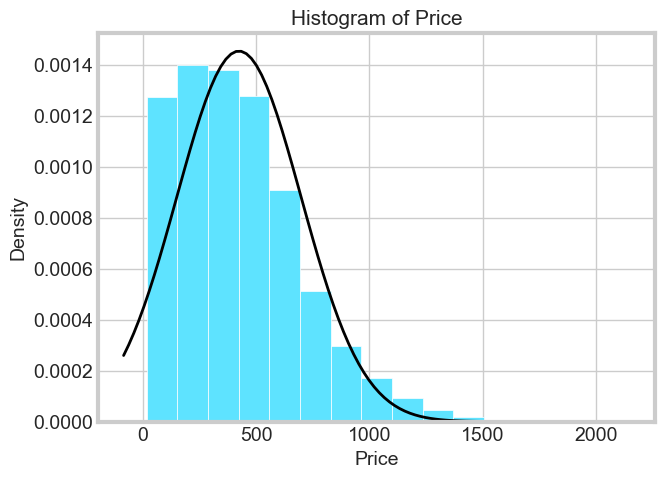

In [112]:
#mean and standard deviation: 
from scipy.stats import norm

mean, std = norm.fit(G2M_cab['Price Charged'])

#plot the histogram:

plt.hist(G2M_cab['Price Charged'], bins = 15, density=True, alpha=1, color = '#5ee3ff')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Histogram of Price', fontsize = 15)

For both companies more rides are prices charged in the range of 125-375 dollars.

Text(0.5, 1.0, 'Histogram of Price')

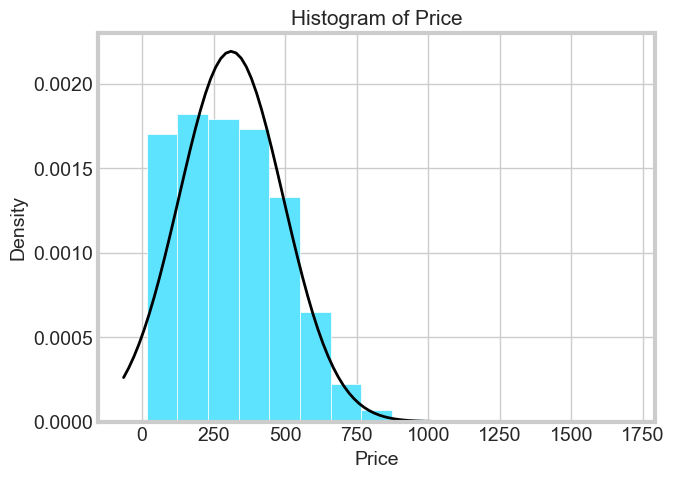

In [113]:
#mean and standard deviation: 
from scipy.stats import norm

mean, std = norm.fit(Pink_Cab_rides['Price Charged'])

#plot the histogram:

plt.hist(Pink_Cab_rides['Price Charged'], bins = 15, density=True, alpha=1, color = '#5ee3ff')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Histogram of Price', fontsize = 15)

For Pink cab company more rides are prices charged in the range of 125-375 dollars.

Text(0.5, 1.0, 'Histogram of Price')

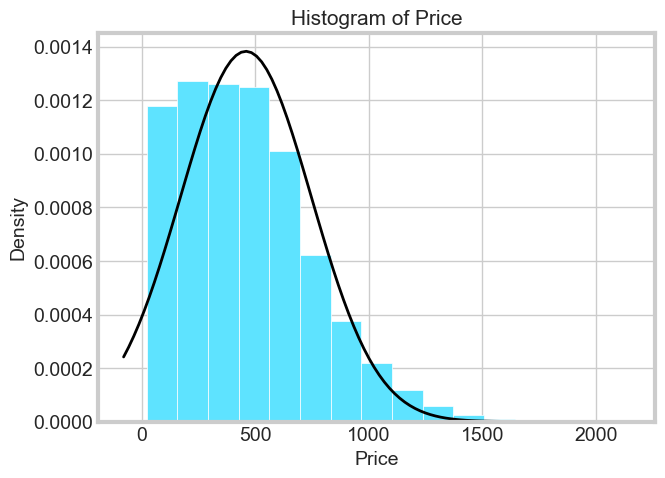

In [115]:
#mean and standard deviation: 
from scipy.stats import norm

mean, std = norm.fit(Yellow_Cab_rides['Price Charged'])

#plot the histogram:

plt.hist(Yellow_Cab_rides['Price Charged'], bins = 15, density=True, alpha=1, color = '#5ee3ff')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Histogram of Price', fontsize = 15)

For Yellow cab company more rides are prices charged in the range of 125-375 dollars.

### Compare pricing per Company:

Perform two sample t-test for Yellow Cab and Pink Cab price comparison:

Null Hypothesis (Ho): Average prices for Yellow Cab rides = average prices for Pink Cab rides.

Alternative Hypothesis(Ha): Average prices for Yellow Cab rides != average prices for Pink Cab rides.

In [116]:
Pink_Cab_price = Pink_Cab_rides['Price Charged'].to_numpy()

Yellow_Cab_price = Yellow_Cab_rides['Price Charged'].to_numpy()

# Mean price of Pink Cab: 
print("Mean price of Pink Cab:", Pink_Cab_price.mean().round())
# Mean price of Yellow Cab: 
print("Mean price of Yellow Cab:", Yellow_Cab_price.mean().round())

stats.ttest_ind(Pink_Cab_price, Yellow_Cab_price)

Mean price of Pink Cab: 311.0
Mean price of Yellow Cab: 458.0


Ttest_indResult(statistic=-140.37224404354248, pvalue=0.0)

The p-value 0<0.05. As a result, we can reject null hypothesis and accept the alternative hypothesis. 
Conclusion: Average prices of Yellow Cab rides are not equal to average prices of Pink Cab rides

### Compare Profit per Company:
Perform two sample t-test for Yellow Cab and Pink Cab profit comparison:

Null Hypothesis (Ho): Average profit for Yellow Cab rides = average profit for Pink Cab rides.

Alternative Hypothesis(Ha): Average profit for Yellow Cab rides != average profit for Pink Cab rides.

In [117]:
Pink_Cab_profit = Pink_Cab_rides['Profit of Trip'].to_numpy()

Yellow_Cab_profit = Yellow_Cab_rides['Profit of Trip'].to_numpy()

# Mean profit of Pink Cab: 
print("Mean profit of Pink Cab:", Pink_Cab_profit.mean().round())
# Mean profit of Yellow Cab: 
print("Mean profit of Yellow Cab:", Yellow_Cab_profit.mean().round())

stats.ttest_ind(Pink_Cab_profit, Yellow_Cab_profit)

Mean profit of Pink Cab: 63.0
Mean profit of Yellow Cab: 160.0


Ttest_indResult(statistic=-160.3715175947807, pvalue=0.0)

The p-value 0<0.05. As a result, we can reject null hypothesis and accept the alternative hypothesis. 
Conclusion: Average profit of Yellow Cab rides are not equal to average profit of Pink Cab rides

### Compare Profit by Gender for Pink Cab:
Perform two sample t-test for Male and Female customers profit comparison of Pink cab company:

Null Hypothesis (Ho): Average profit for males of Pink cab = average profit for females of Pink Cab.

Alternative Hypothesis(Ha): Average profit for males of Pink cab != average profit for females of Pink cab.

In [145]:
Male_rides_pink = G2M_cab[(G2M_cab['Gender'] == 'Male') & (G2M_cab['Company'] == 'Pink Cab')]
Female_rides_pink = G2M_cab[(G2M_cab['Gender'] == 'Female') & (G2M_cab['Company'] == 'Pink Cab')]

In [146]:
Male_pink_profit = Male_rides_pink['Profit of Trip'].to_numpy()

Female_pink_profit = Female_rides_pink['Profit of Trip'].to_numpy()

# Mean profit of male users of Pink Cab: 
print("Mean profit of male users of Pink Cab:", Male_pink_profit.mean().round())
# Mean profit of female users of Pink Cab: 
print("Mean profit of female users of Pink Cab:", Female_pink_profit.mean().round())

stats.ttest_ind(Male_pink_profit, Female_pink_profit)

Mean profit of male users of Pink Cab: 63.0
Mean profit of female users of Pink Cab: 62.0


Ttest_indResult(statistic=1.5754642478511207, pvalue=0.11515305900425798)

The p-value 0.1>0.05. As a result, we cannot reject null hypothesis. 
Conclusion: Average profit of male customers is equal to average profit of female customers of Pink Cab.
There is no effect of Gender on Profit of Pink Cab.

### Compare Profit by Gender for Yellow Cab:
Perform two sample t-test for Male and Female customers profit comparison of Yellow cab company:

Null Hypothesis (Ho): Average profit for males of Yellow cab = average profit for females of Yellow Cab.

Alternative Hypothesis(Ha): Average profit for males of Yellow cab != average profit for females of Yellow cab.

In [147]:
Male_rides_yellow = G2M_cab[(G2M_cab['Gender'] == 'Male') & (G2M_cab['Company'] == 'Yellow Cab')]
Female_rides_yellow = G2M_cab[(G2M_cab['Gender'] == 'Female') & (G2M_cab['Company'] == 'Yellow Cab')]

In [148]:
Male_yellow_profit = Male_rides_yellow['Profit of Trip'].to_numpy()

Female_yellow_profit = Female_rides_yellow['Profit of Trip'].to_numpy()

# Mean profit of male users of Yellow Cab: 
print("Mean profit of male users of Yellow Cab:", Male_yellow_profit.mean().round())
# Mean profit of female users of Yellow Cab: 
print("Mean profit of female users of Yellow Cab:", Female_yellow_profit.mean().round())

stats.ttest_ind(Male_yellow_profit, Female_yellow_profit)

Mean profit of male users of Yellow Cab: 163.0
Mean profit of female users of Yellow Cab: 156.0


Ttest_indResult(statistic=10.315494207195322, pvalue=6.060473042494056e-25)

The p-value 6.060473042494056e-25<0.05. As a result, we reject null hypothesis. 
Conclusion: Average profit of male customers is not equal to average profit of female customers of Yellow Cab.
Gender effects the profit of Yellow cab company.

## Overall for G2M strategy based on above analysis Yellow Cab company is better investment compared to Pink Cab Company